# BoomBikes:  building a multiple linear regression model for the prediction of demand for shared bikes

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Goal

We need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

----

### Approach of Solving the problem:
    
**We are going to solve the problem in 4 sections i.e. :**
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


# *`Step 1: Data understanding and exploration`*

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,12
import seaborn as sns
import missingno as mn

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bike = pd.read_csv(r'C:\Upgrad Program\Linear Regression Assignment\day.csv')

In [3]:
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Inspecting the various aspects of bike sharing data frame

In [4]:
# Number of rows and columns
df_bike.shape

(730, 16)

In [5]:
# summary of dataset
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# insights of the features
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

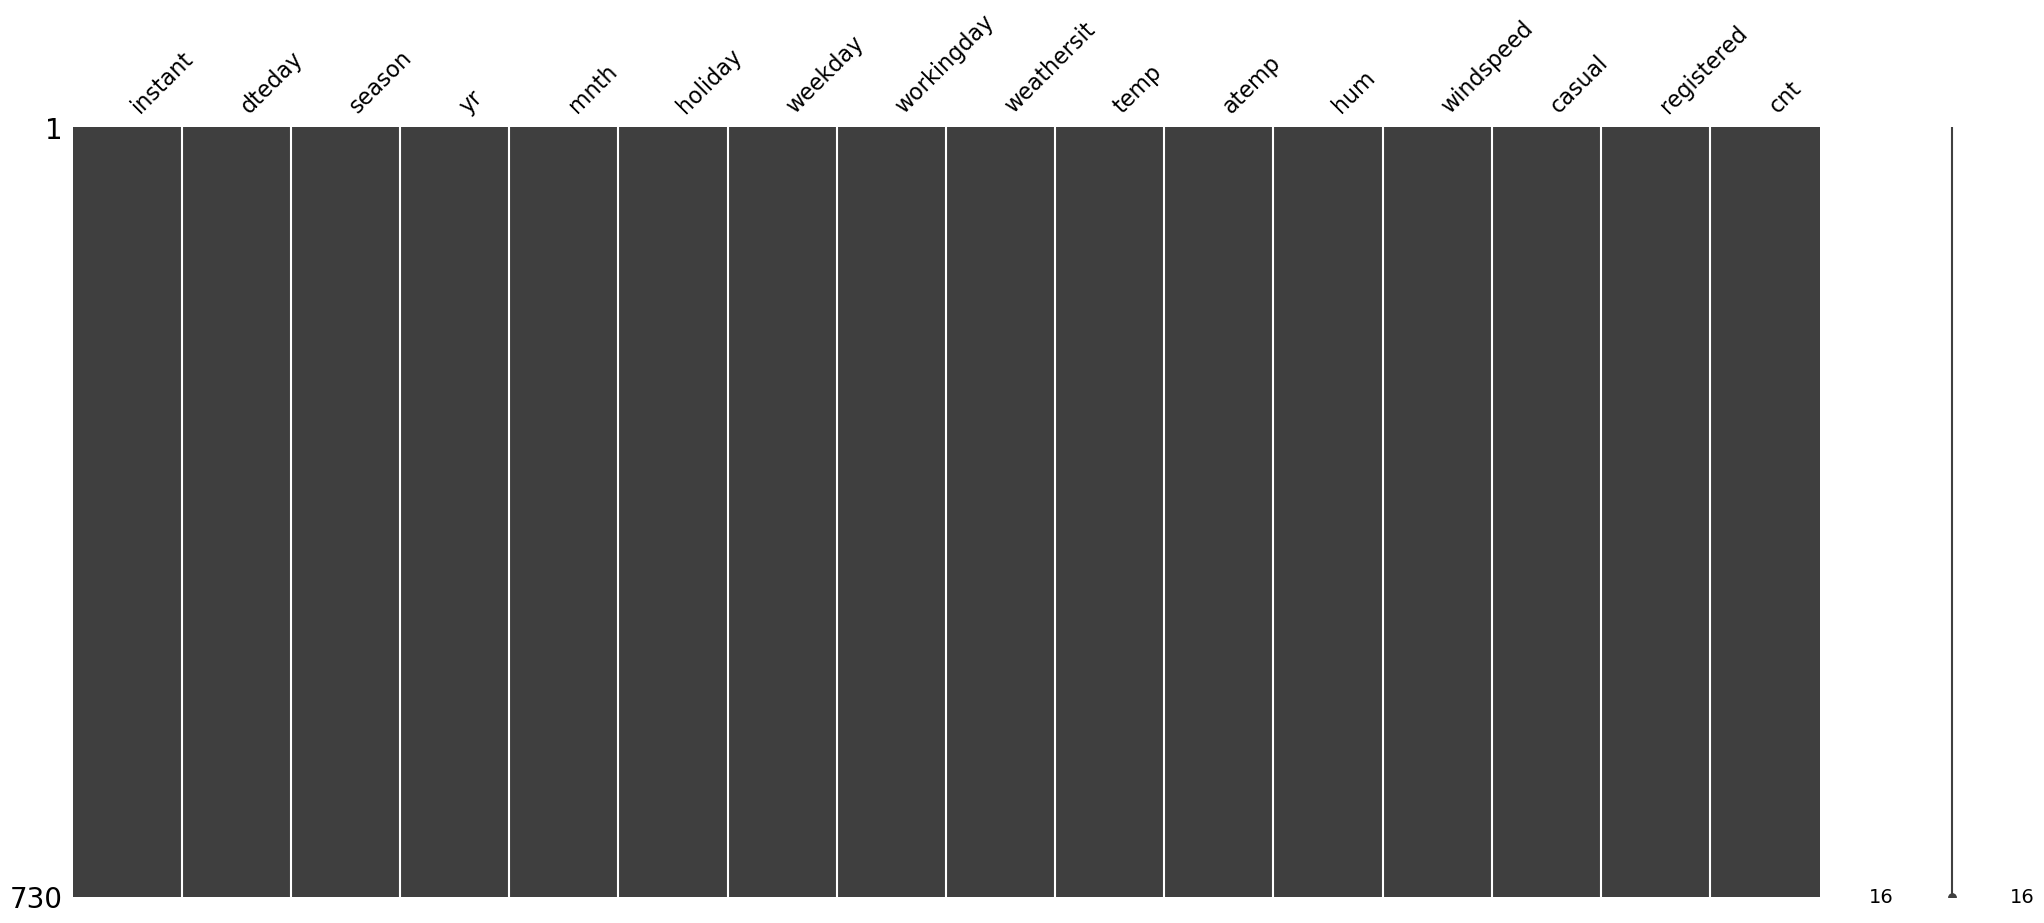

In [7]:
# Checking is any missing values are there
mn.matrix(df_bike)

> **Insights:** There are no missing values in any column, so we can proceed for further analysis on data

### Let's explore the columns and their data types.

- **instant** : record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : whether day is a holiday or not 
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp** : feeling temperature in Celsius
- **hum** : humidity
- **windspeed** : wind speed
- **casual** : count of casual users
- **registered** : count of registered users
- **cnt** : count of total rental bikes including both casual and registered
	

### Dropping redundant columns

- Initially we can see that "casual" and "registered" are of no use, as we are considering "cnt" for total number of users. So we can drop these columns
- We can drop "instant" too , as this column doesn't provide any information related to the data
- We can also drop "dteday" as for the analysis part, we already have columns for year and month, and so particular dates wont be necessary
- Also, we have 'weekday' and 'workingday' columns, so 'holiday' is irrelevant and dropping the same wont cause any issue.

In [8]:
df_bike.drop(['instant','casual','registered','dteday','holiday'],axis=1,inplace=True)

In [9]:
df_bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Renaming the column names for better readability

In [10]:
df_bike.rename(columns={'yr': 'year','mnth': 'month', 'hum':'humidity','cnt':'total_count'},inplace=True)

In [11]:
#Checking the updated data
df_bike.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data

### 1. We have seen that the column data types are mentioned as integer type, even though they should be considered as categorical values. So we will first convert them as category type.

> *Season* : 
>
>* 1: Spring
>* 2: Summer
>* 3: Fall
>* 4: Winter

In [12]:
# Converting numerical values to the categorical values, based on the dictionary provided
season = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
df_bike['season'] = df_bike['season'].map(season)

In [13]:
# Checking whether the conversion is done properly or not
df_bike['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

>*Weathersit*
>
>* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
>* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
>* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
>* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
# Extracting the type of weather situations present in the data
df_bike['weathersit'].unique()

array([2, 1, 3], dtype=int64)

Here we can see that even though in data dictionary, 4 categories are mentioned, but in dataframe, only 3 categories are available. So, we will define the categories only for 3 sections

In [15]:
weathersit = {1:'Clear',2:'Mist and Cloudy',3:'Light Snow'}
df_bike['weathersit'] = df_bike['weathersit'].map(weathersit)

In [16]:
# Checking whether the conversion is done properly or not
df_bike['weathersit'].astype('category').value_counts()

Clear              463
Mist and Cloudy    246
Light Snow          21
Name: weathersit, dtype: int64

>*Working day*
>
>* 1: if day is neither weekend nor holiday
>* 0: otherwise (or holiday)

In [17]:
workingday = {1:'working_day',0:'Holiday'}
df_bike['workingday'] = df_bike['workingday'].map(workingday)

In [18]:
# Checking whether the conversion is done properly or not
df_bike['workingday'].astype('category').value_counts()

working_day    499
Holiday        231
Name: workingday, dtype: int64

>*Month*
>
>* 1:Jan
>* 2:Feb
>* 3:Mar
>* 4:Apr
>* 5:May
>* 6:June
>* 7:July
>* 8:Aug
>* 9:Sep
>* 10:Oct
>* 11:Nov
>* 12:Dec

In [19]:
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_bike['month'] = df_bike['month'].map(months)

# Checking whether the conversion is done properly or not
df_bike['month'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
July    62
Mar     62
May     62
Oct     62
Apr     60
June    60
Nov     60
Sep     60
Feb     56
Name: month, dtype: int64

>*WeekDay:*
>
>* 0:Thu
>* 1:Fri 
>* 2:Sat
>* 3:Sun
>* 4:Mon
>* 5:Tue
>* 6:Wed

In [20]:
week = {0:'Thu',1:'Fri',2:'Sat',3:'Sun',4:'Mon',5:'Tue',6:'Wed'}
df_bike['weekday'] = df_bike['weekday'].map(week)
# Checking whether the conversion is done properly or not
df_bike['weekday'].astype('category').value_counts()

Fri    105
Thu    105
Wed    105
Mon    104
Sat    104
Tue    104
Sun    103
Name: weekday, dtype: int64

# *`Step 2: Data Visualization`*

### Plotting all the categorical data 

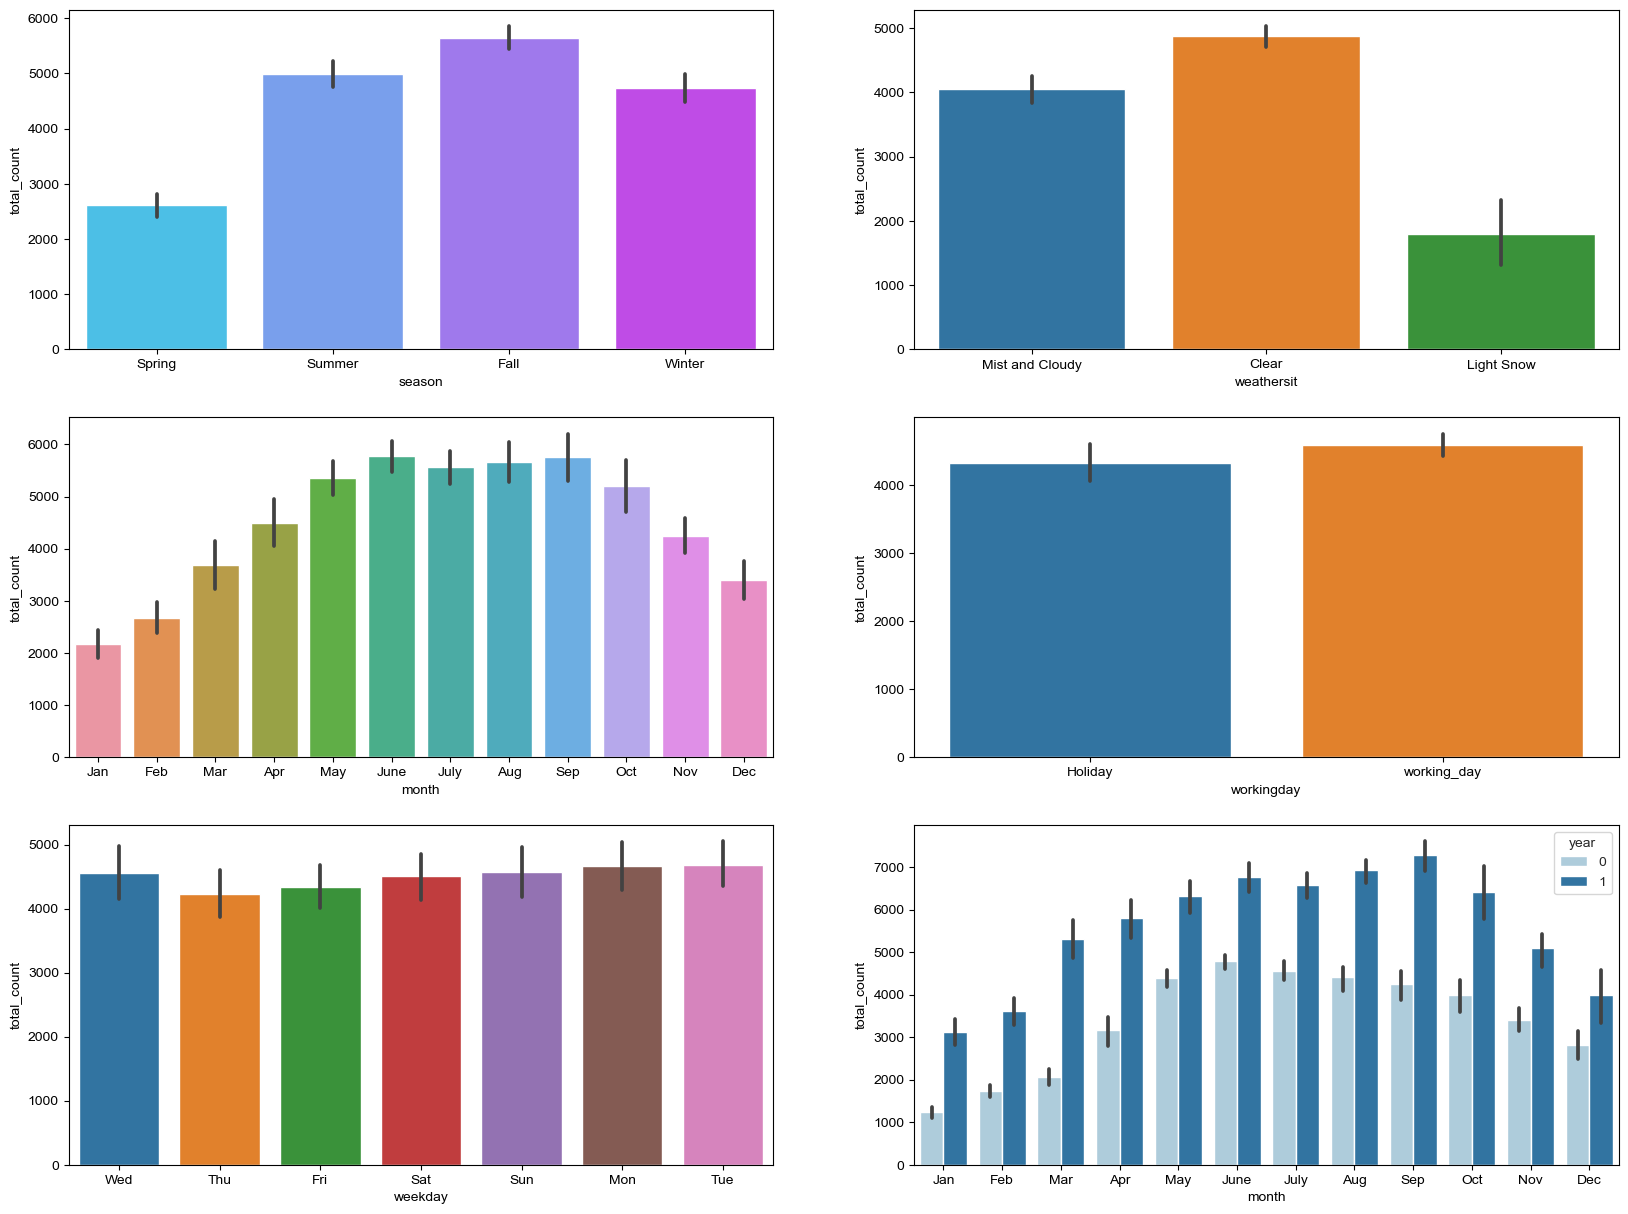

In [21]:
fig, axes = plt.subplots(3, 2, figsize = (20,15))
sns.set_style('whitegrid')
#create chart in each subplot
sns.barplot(data=df_bike, x='season', y='total_count',palette='cool', ax=axes[0,0])
sns.barplot(data=df_bike, x='weathersit', y='total_count', ax=axes[0,1])
sns.barplot(data=df_bike, x='month', y='total_count', ax=axes[1,0])
sns.barplot(data=df_bike, x='workingday', y='total_count', ax=axes[1,1])
sns.barplot(data=df_bike, x='weekday', y='total_count', ax=axes[2,0])
sns.barplot('month','total_count',hue='year',data=df_bike,palette='Paired',ax=axes[2,1] )
plt.show()

> *Insights*: 
>
>* There's a gradual trend in season, month,weathersit and year
>* There's no such trend in workingday or weekday

### 2. Now, we will analyse other numeric column values

#### *temp* and *atemp*

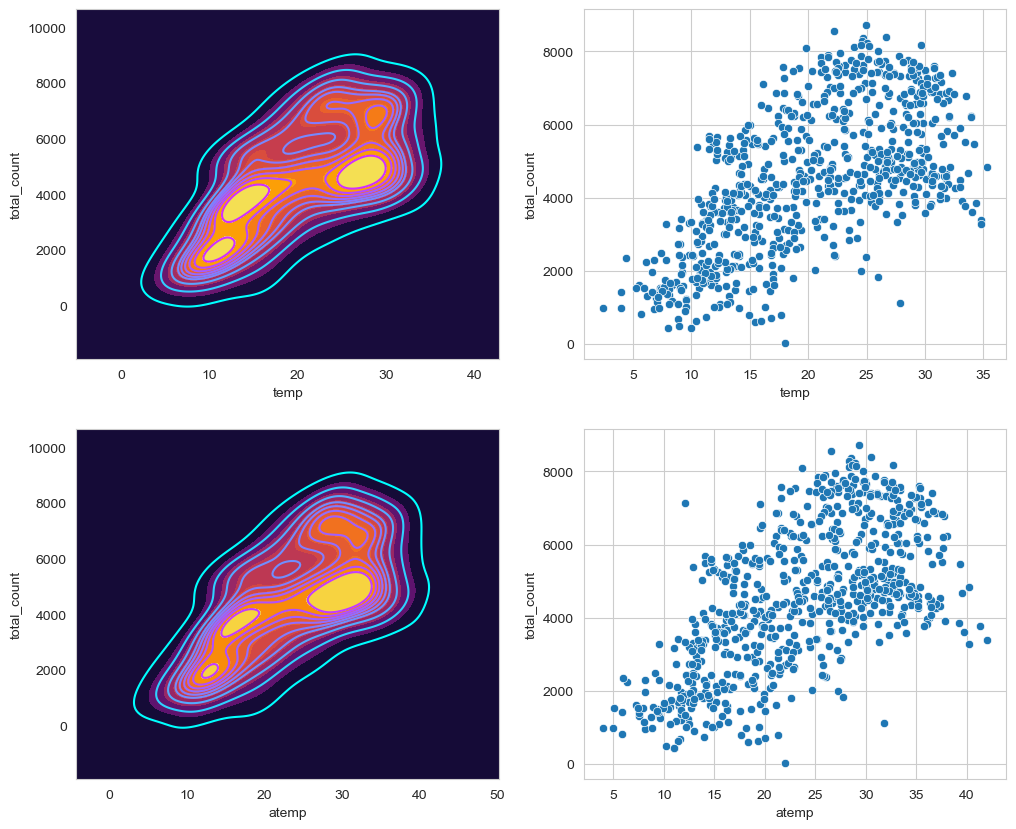

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (12,10))
sns.set_style('whitegrid')
#created kde plot and scatter plot for temp and atemp, to analysis the distribution
sns.scatterplot(x='temp',y='total_count',data=df_bike,ax=axes[0,1])
k1 = sns.kdeplot(df_bike.temp,df_bike.total_count,shade=True,shade_lowest=True,cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(df_bike.temp,df_bike.total_count, ax=axes[0,0], cmap='cool')
sns.scatterplot(x='atemp',y='total_count',data=df_bike,ax=axes[1,1])
k2 = sns.kdeplot(df_bike.atemp,df_bike.total_count, ax=axes[1,0],shade=True,shade_lowest=True,cmap='inferno')
k2b = sns.kdeplot(df_bike.atemp,df_bike.total_count, ax=axes[1,0], cmap='cool')
plt.show()

>**Insights**: 
>
>* Bike rentals generally are observed at higher temp and atemp
>* temp and atemp are highly correlated

#### humidity and windspeed

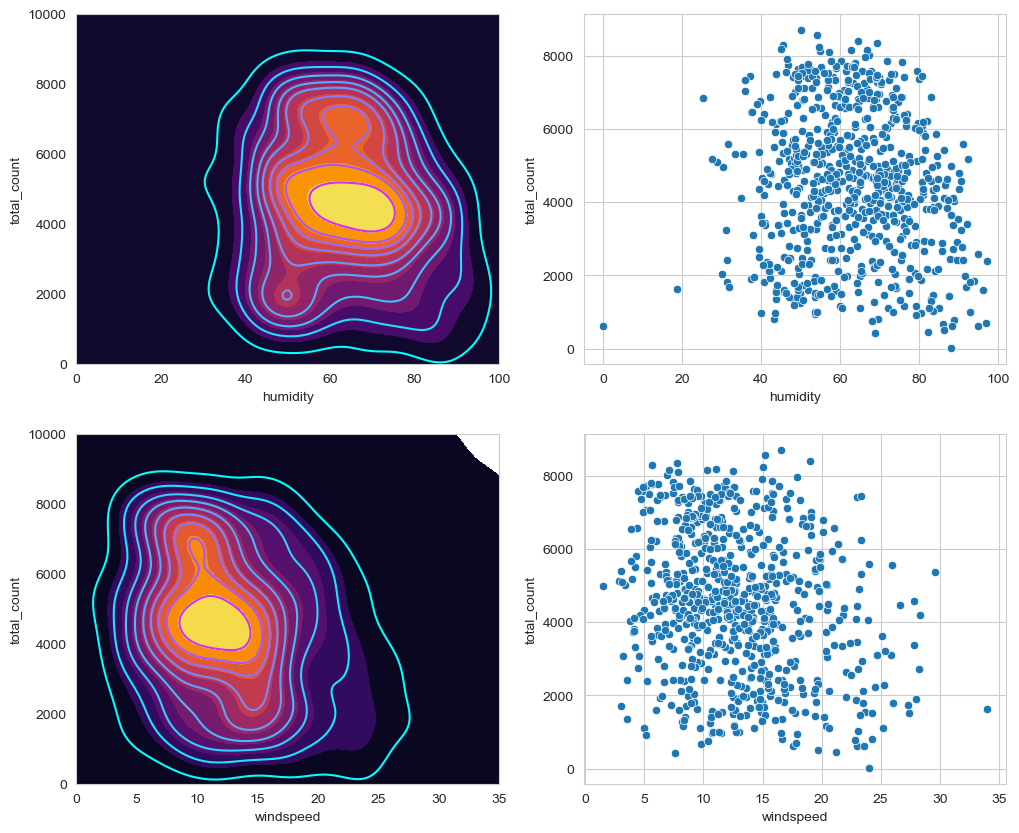

In [23]:
fig, axes = plt.subplots(2, 2, figsize = (12,10))
sns.set_style('whitegrid')
#created kde plot and scatter plot for temp and atemp, to analysis the distribution
sns.scatterplot(x='humidity',y='total_count',data=df_bike,ax=axes[0,1])
k1 = sns.kdeplot(df_bike.humidity,df_bike.total_count,shade=True,shade_lowest=True,cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(df_bike.humidity,df_bike.total_count, ax=axes[0,0], cmap='cool')
sns.scatterplot(x='windspeed',y='total_count',data=df_bike,ax=axes[1,1])
k2 = sns.kdeplot(df_bike.windspeed,df_bike.total_count, ax=axes[1,0],shade=True,shade_lowest=True,cmap='inferno')
k2b = sns.kdeplot(df_bike.windspeed,df_bike.total_count, ax=axes[1,0], cmap='cool')
k1.set(xlim=(0,100), ylim=(0,10000))
k2.set(xlim=(0,35), ylim=(0,10000))

plt.show()

>**Insights:**
>
>* Wind speeds increase with a greater temperature difference.
>* Wind speed near the surface is most highly correlated with the temperature.
>* Humidity is observed as rightly skewed and windspeed is observed as left skewed.
>* Temperature being directly proportional to Humidity
>* Bike Rentals are making during high humidity.


### 3.Let's look into the correlation among all the independent variables

In [24]:
df_bike.dtypes

season          object
year             int64
month           object
weekday         object
workingday      object
weathersit      object
temp           float64
atemp          float64
humidity       float64
windspeed      float64
total_count      int64
dtype: object

In [25]:
# First convert the dtypes as similar one i.e. float
df_bike['total_count'] = df_bike['total_count'].astype("float")

In [26]:
# All numeric variables in the dataset to get the correalation
df_bike_numeric = df_bike.select_dtypes(include=['float64'])
df_bike_numeric.head()

,temp,atemp,humidity,windspeed,total_count
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


In [27]:
# Correlation matrix
cor = df_bike_numeric.corr()
cor

,temp,atemp,humidity,windspeed,total_count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
total_count,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

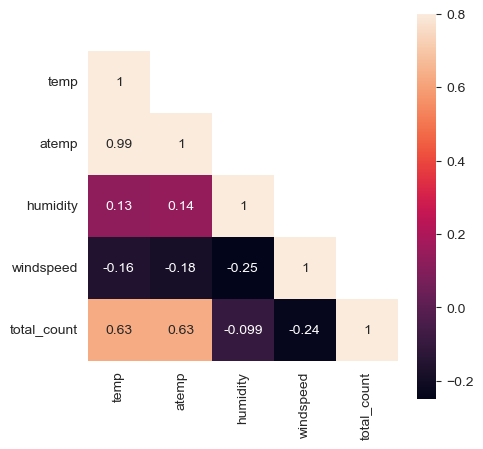

In [28]:
# plotting heatmap to visualize better
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

<Figure size 2000x1200 with 0 Axes>

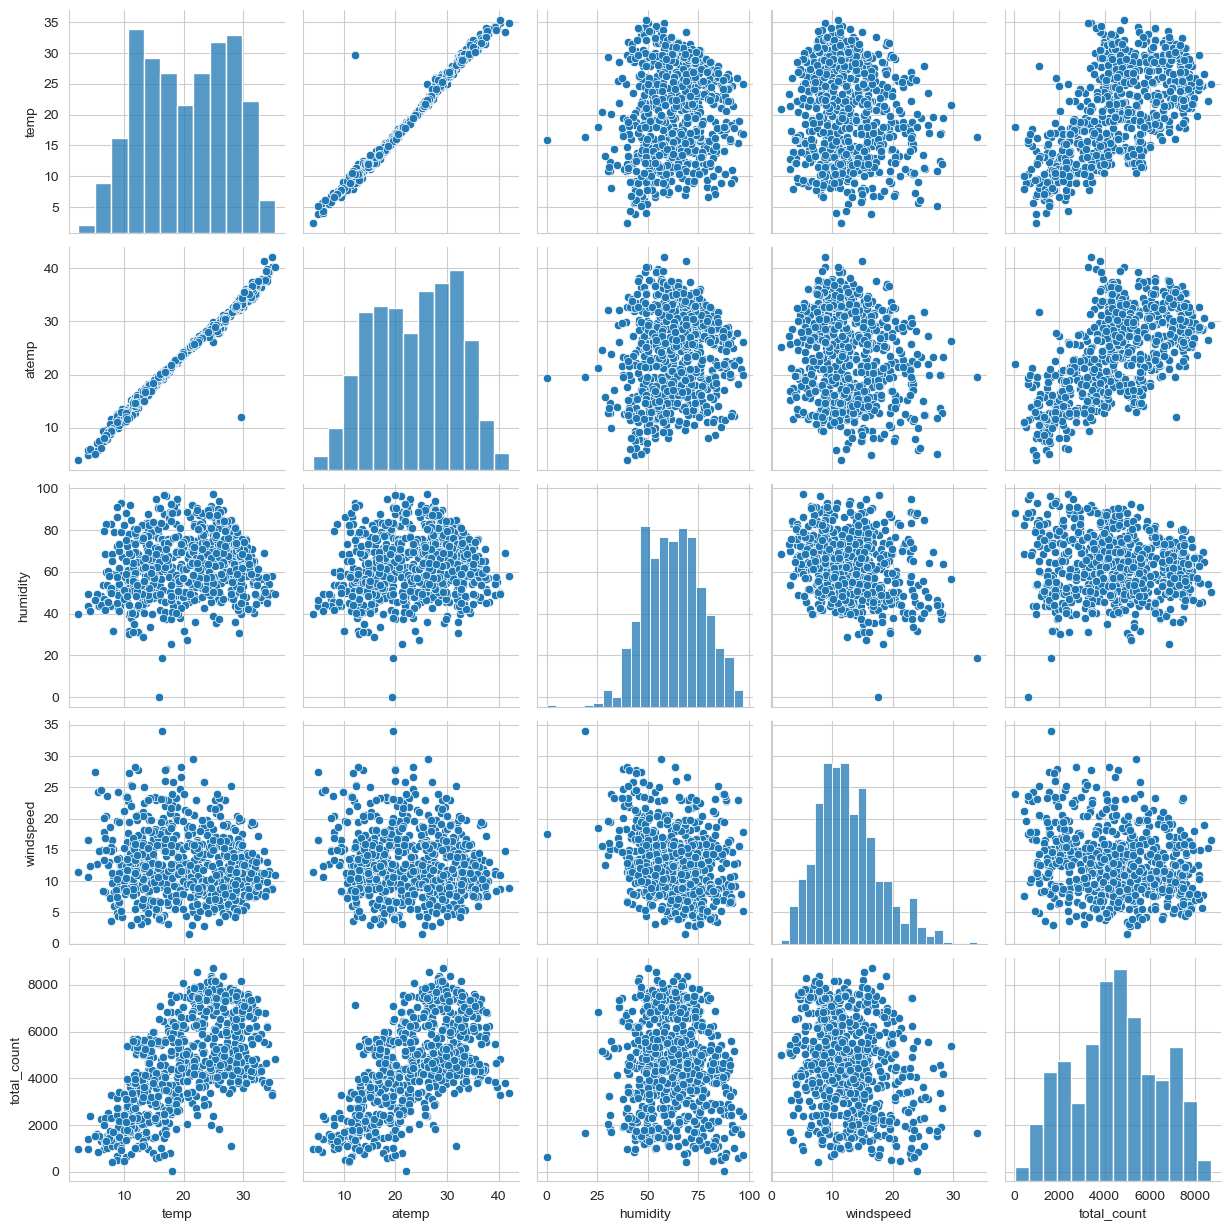

In [29]:
plt.figure(figsize=(20, 12))
sns.pairplot(df_bike_numeric)
plt.show()

>**Insights:**
>
>* Total count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.
>* Some of the independent variables are highly correlated : atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1. So we will only consider one variable between both of them to build a model


In [30]:
# Dropping atemp as it is highly correlated with temp
df_bike.drop('atemp',axis=1,inplace=True) 

In [31]:
df_bike.head()

,season,year,month,weekday,workingday,weathersit,temp,humidity,windspeed,total_count
0,Spring,0,Jan,Wed,Holiday,Mist and Cloudy,14.110847,80.5833,10.749882,985.0
1,Spring,0,Jan,Thu,Holiday,Mist and Cloudy,14.902598,69.6087,16.652113,801.0
2,Spring,0,Jan,Fri,working_day,Clear,8.050924,43.7273,16.636703,1349.0
3,Spring,0,Jan,Sat,working_day,Clear,8.200000,59.0435,10.739832,1562.0
4,Spring,0,Jan,Sun,working_day,Clear,9.305237,43.6957,12.522300,1600.0


# *`Step 3: Data Preparation`*

Now as we have removed the redundant columns, its time to organize our categorical data into dummy variables i.e. in the form of binary values 0s and 1s, which will be easily feasible while doing linear regression model

In [32]:
#Check for the datatypes
df_bike.dtypes

season          object
year             int64
month           object
weekday         object
workingday      object
weathersit      object
temp           float64
humidity       float64
windspeed      float64
total_count    float64
dtype: object

In [33]:
df_bike.head()

,season,year,month,weekday,workingday,weathersit,temp,humidity,windspeed,total_count
0,Spring,0,Jan,Wed,Holiday,Mist and Cloudy,14.110847,80.5833,10.749882,985.0
1,Spring,0,Jan,Thu,Holiday,Mist and Cloudy,14.902598,69.6087,16.652113,801.0
2,Spring,0,Jan,Fri,working_day,Clear,8.050924,43.7273,16.636703,1349.0
3,Spring,0,Jan,Sat,working_day,Clear,8.200000,59.0435,10.739832,1562.0
4,Spring,0,Jan,Sun,working_day,Clear,9.305237,43.6957,12.522300,1600.0


#### Dummy Variables
for creating dummy variable, we can consider the variables `season`,`month`,`weekday`,`workingday` and `weathersit`, which will be converted into integers. 

In [34]:
# Subset all categorical variables
df_bike_categorical=df_bike.select_dtypes(include=['object'])

In [35]:
# Convert into dummies
df_bike_dummmies = pd.get_dummies(df_bike_categorical, drop_first=True)
df_bike_dummmies.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


We don't need categorical values anymore, as all the calculations will be analysed on the basis of dummy variable. So we will drop the categorical columns and add dummy variable to the main dataframe

In [36]:
# Drop categorical variable columns
df_bike = df_bike.drop(list(df_bike_categorical.columns), axis=1)

In [37]:
# Concatenate dummy variables with the original dataframe
df_bike = pd.concat([df_bike, df_bike_dummmies], axis=1)

In [38]:
df_bike.head()

,year,temp,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist and Cloudy
0,0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# *`Step 4: Model Building and Evaluation`*

Now we will build the model. So we will do following steps in this process:
- split the data into training and test sets
- rescaling the features
- training the model
- residual analysis
- prediction and evaluation

#### Splitting the Data into Training and Testing Sets

In [39]:
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
#Checking train set
print(df_train.shape)

#Checking test set
print(df_test.shape)

(510, 28)
(219, 28)


#### Rescaling the features

We have done the test-train split, and now we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. 
Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as we don't want it to learn anything from the test data.

In [41]:
df_bike

,year,temp,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist and Cloudy
0,0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,10.420847,65.2917,23.458911,2114.0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
726,1,10.386653,59.0000,10.416557,3095.0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
727,1,10.386653,75.2917,8.333661,1341.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
728,1,10.489153,48.3333,23.500518,1796.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [42]:
#creating object of StandardScaler
scaler = StandardScaler()

In [43]:
# Apply scaler() to all the columns except 'dummy' variables
dummy_vars = ['temp', 'humidity', 'windspeed','total_count']

df_train[dummy_vars] = scaler.fit_transform(df_train[dummy_vars])

In [44]:
#Getting the summary
df_train.describe()

,year,temp,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist and Cloudy
count,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,-2.757054e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.243137,0.245098,0.24902,0.096078,0.084314,...,0.080392,0.133333,0.131373,0.158824,0.143137,0.127451,0.154902,0.676471,0.029412,0.343137
std,0.500429,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.294988,0.278131,...,0.272166,0.340268,0.338139,0.365870,0.350557,0.333805,0.362166,0.468282,0.169124,0.475223
min,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we will analyse, which columns to take for model building, which have high correlation coefficients 

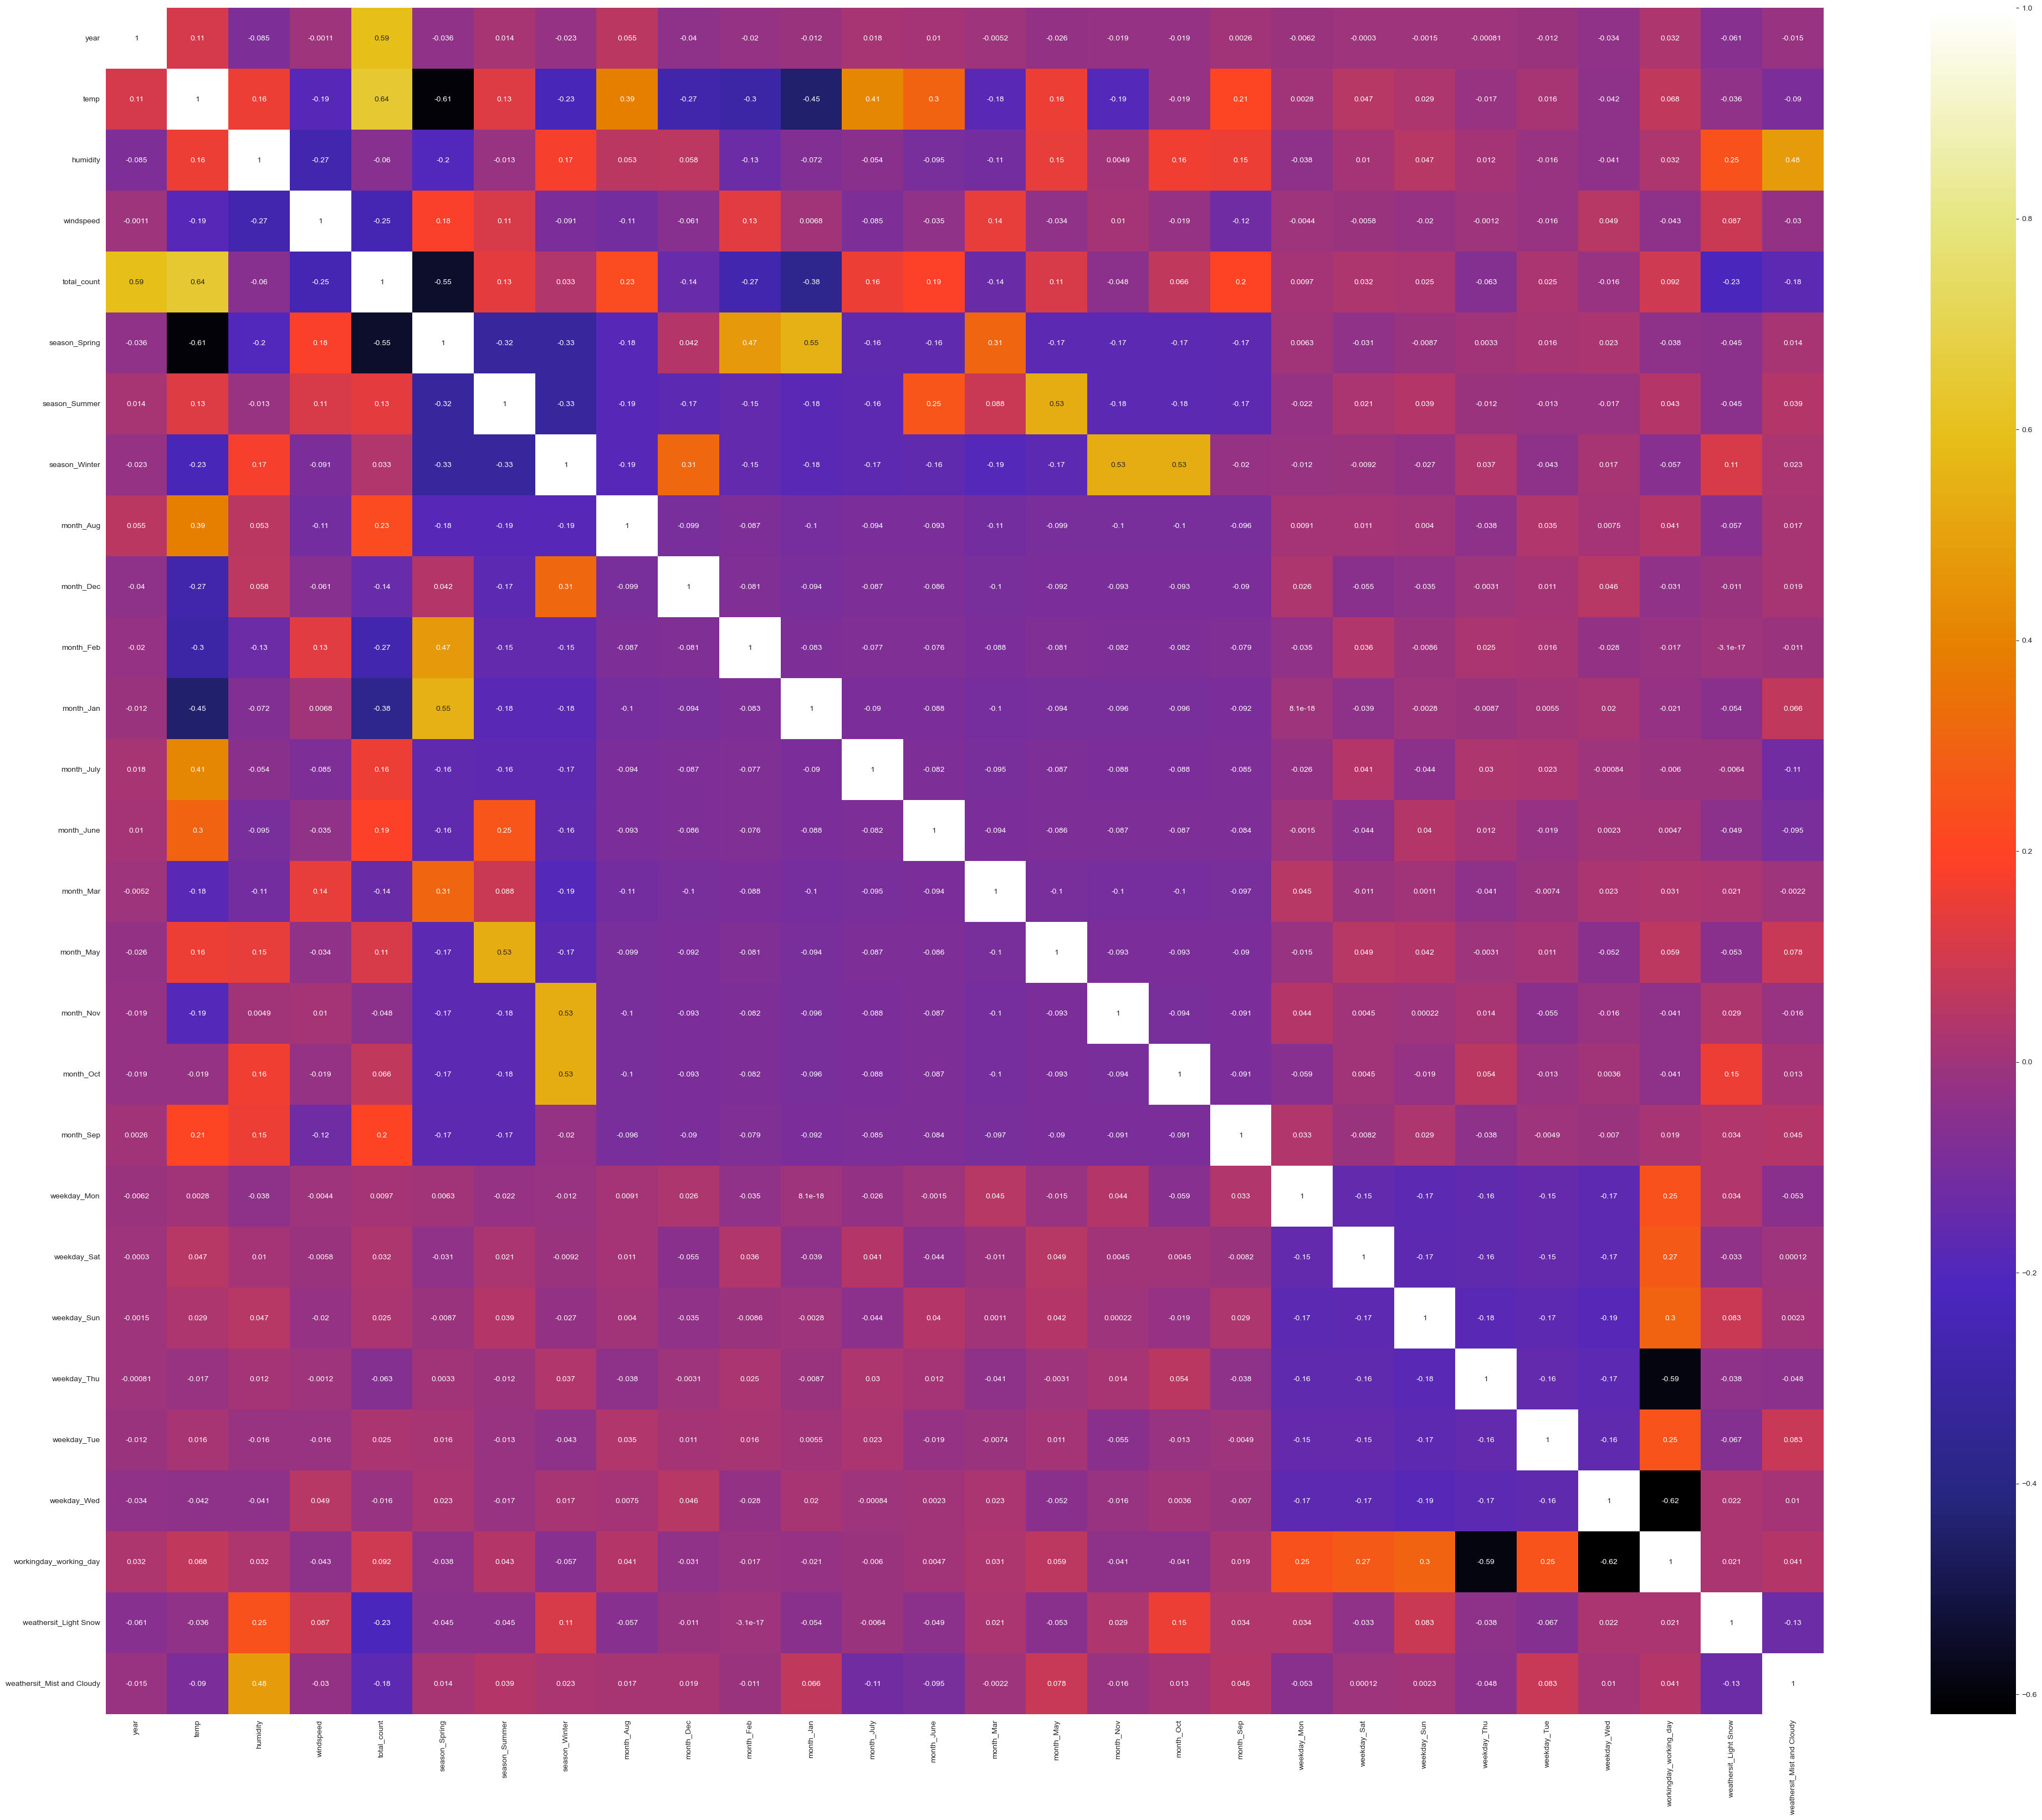

In [45]:
plt.figure(figsize = (50, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="CMRmap")
plt.show()

> From the heatmap, lets take the variable 'temp' which is highly correlated with total_count

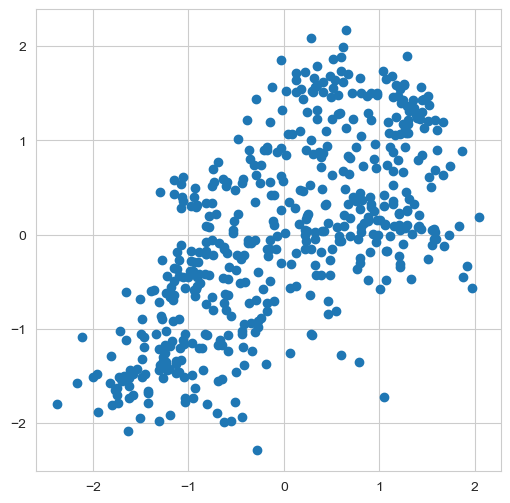

In [46]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.total_count)
plt.show()

#### Building and training the first model(using Ordinary Least Squares regression (OLS))

- taking all variable as x
- taking total_count as y

In [47]:
#declaring x and y training set
y_train = df_train.pop('total_count')
X_train = df_train

In [48]:
#adding constant
X_train_lm = sm.add_constant(X_train)

#linear regression
lr = sm.OLS(y_train, X_train_lm).fit()

#checking parameters
lr.params

const                        -0.871981
year                          1.034512
temp                          0.453072
humidity                     -0.098301
windspeed                    -0.140963
season_Spring                -0.214639
season_Summer                 0.172591
season_Winter                 0.471747
month_Aug                     0.064197
month_Dec                    -0.203171
month_Feb                    -0.143876
month_Jan                    -0.279788
month_July                   -0.179835
month_June                   -0.013248
month_Mar                     0.004658
month_May                     0.106697
month_Nov                    -0.186526
month_Oct                     0.033576
month_Sep                     0.361274
weekday_Mon                   0.052012
weekday_Sat                   0.008989
weekday_Sun                   0.069167
weekday_Thu                   0.235327
weekday_Tue                   0.093179
weekday_Wed                   0.478386
workingday_working_day   

In [49]:
# Instantiate linear regression model
lm1 = LinearRegression()

# Fit a line
lm1.fit(X_train, y_train)

LinearRegression()

In [50]:
# Print the coefficients and intercept
print(lm1.coef_)
print(lm1.intercept_)

[ 1.03451154  0.45307204 -0.09830147 -0.14096286 -0.21463884  0.17259094
  0.47174684  0.06419678 -0.2031708  -0.14387608 -0.27978763 -0.17983536
 -0.01324757  0.00465813  0.10669745 -0.18652621  0.03357628  0.36127411
  0.05201171  0.00898901  0.06916729  0.23532745  0.09317876  0.47838597
  0.38741477 -1.14739119 -0.27216551]
-0.8719809754029427


In [51]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        12:32:10   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8720      0.175     -4.976      0.000      -1.216      -0.528
year                           1.0345      0.036     28.820      0.000       0.964       1.105
temp                           0.4531      0.047      9.734      0.000       0.362       0.545
humidity                      -0.0983      0.025     -3.933      0.000      -0.147      -0.049
windspeed                     -0.1410      0.019     -7.257      0.000      -0.179      -0.103
season_Spring                 -0.2146      0.134     -1.607      0.109      -0.477       0.048
season_Summer                  0.1726      0.117      1.478      0.140      -0.057       0.402
season_Winter                  0.4717      0.124      3.794      0.000       0.227       0.716
month_Aug                      0.0642      0.150      0.428      0.669      -0.231       0.359
month_Dec                     -0.2032      0.150     -1.358      0.175      -0.497       0.091
month_Feb                     -0.1439      0.147     -0.982      0.327      -0.432       0.144
month_Jan                     -0.2798      0.149     -1.873      0.062      -0.573       0.014
month_July                    -0.1798      0.156     -1.151      0.250      -0.487       0.127
month_June                    -0.0132      0.112     -0.119      0.906      -0.233       0.206
month_Mar                      0.0047      0.109      0.043      0.966      -0.210       0.219
month_May                      0.1067      0.094      1.140      0.255      -0.077       0.291
month_Nov                     -0.1865      0.162     -1.152      0.250      -0.505       0.132
month_Oct                      0.0336      0.159      0.211      0.833      -0.280       0.347
month_Sep                      0.3613      0.143      2.533      0.012       0.081       0.641
weekday_Mon                    0.0520      0.067      0.773      0.440      -0.080       0.184
weekday_Sat                    0.0090      0.068      0.132      0.895      -0.125       0.143
weekday_Sun                    0.0692      0.065      1.064      0.288      -0.059       0.197
weekday_Thu                    0.2353      0.122      1.937      0.053      -0.003       0.474
weekday_Tue                    0.0932      0.068      1.366      0.173      -0.041       0.227
weekday_Wed                    0.4784      0.121      3.944      0.000       0.240       0.717
workingday_working_day         0.3874      0.119      3.269      0.001       0.155       0.620
weathersit_Light Snow         -1.1474      0.117     -9.778      0.000      -1.378      -0.917
weathersit_Mist and Cloudy    -0.2722      0.046     -5.854      0.000      -0.364      -0.181
==============================================================================
Omnibus:                       84.475   Durbin-Watson:     

>**Insights:**
>
>* This model has an Adjusted R-squared value of **84.5%** which seems pretty good. 
>* Adjusted R-squared can be increased or model can be better by dropping out least correlated variable. So we will reduce the number of features. 

#### Building and training the second model(using RFE with 15 features)

- In this, we will build a model using recursive feature elimination to select features.
- We'll first start off with an arbitrary number of features (10 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).
- We have 28 features, so dropping one by one will be pretty easy using RFE


In [52]:
#linear model 2
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [53]:
#running RFE
rfe1 = RFE(lm2, n_features_to_select=10,step=1)

# Fit with 10 features
rfe1.fit(X_train, y_train)

# Print the boolean results
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('year', True, 1),
 ('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', False, 2),
 ('month_Aug', False, 11),
 ('month_Dec', False, 4),
 ('month_Feb', False, 6),
 ('month_Jan', False, 5),
 ('month_July', True, 1),
 ('month_June', False, 16),
 ('month_Mar', False, 18),
 ('month_May', False, 9),
 ('month_Nov', False, 3),
 ('month_Oct', False, 15),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', False, 17),
 ('weekday_Sun', False, 13),
 ('weekday_Thu', True, 1),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', True, 1),
 ('workingday_working_day', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

In [54]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]
print(col1)

Index(['year', 'temp', 'season_Spring', 'month_July', 'month_Sep',
       'weekday_Thu', 'weekday_Wed', 'workingday_working_day',
       'weathersit_Light Snow', 'weathersit_Mist and Cloudy'],
      dtype='object')


In [55]:
# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1

,const,year,temp,season_Spring,month_July,month_Sep,weekday_Thu,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist and Cloudy
653,1.0,1,-0.121335,0,0,0,0,0,1,0,0
576,1.0,1,1.231731,0,1,0,0,0,1,0,0
426,1.0,1,-0.420478,1,0,0,0,1,0,0,1
728,1.0,1,-1.294913,1,0,0,1,0,0,0,0
482,1.0,1,-0.627580,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1.273152,0,0,0,0,0,1,0,1
578,1.0,1,1.448040,0,0,0,0,0,1,0,0
53,1.0,0,-1.483204,1,0,0,0,0,1,0,0
350,1.0,0,-1.281106,0,0,0,0,1,0,0,1


In [56]:
# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.30e-179
Time:                        12:32:11   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

>**Insights:**
>
>* Adjusted R-squared value has gone from 84.5%(model1) to 81.7%(model2). This is indeed a good indication to proceed with these selected features. 
>* The summary can be more clarified by checking for the multicollinearity among these variables.
>* p value for weekday_Thu is greater than 0.05

Let's drop weekday_wed as its value is very high

In [57]:
X_train1= X_train_rfe1.drop('weekday_Thu',1)

In [58]:
X_train1_sm= sm.add_constant(X_train1)
lm2 = sm.OLS(y_train,X_train1_sm).fit() 

In [59]:
#Analyzing the summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.22e-179
Time:                        12:32:11   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.4002      0.054     -7.374      0.000      -0.507      -0.294
year                           1.0458      0.038     27.273      0.000       0.970       1.121
temp                           0.3999      0.027     14.797      0.000       0.347       0.453
season_Spring                 -0.6842      0.056    -12.129      0.000      -0.795      -0.573
month_July                    -0.2972      0.081     -3.676      0.000      -0.456      -0.138
month_Sep                      0.2757      0.073      3.777      0.000       0.132       0.419
weekday_Wed                    0.2749      0.067      4.102      0.000       0.143       0.407
workingday_working_day         0.2327      0.052      4.476      0.000       0.131       0.335
weathersit_Light Snow         -1.3185      0.114    -11.522      0.000      -1.543      -1.094
weathersit_Mist and Cloudy    -0.3647      0.041     -8.922      0.000      -0.445      -0.284
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we have all the pvalues less than 0.05, let check for vif values as well

In [60]:
#dropping constant to check for VIF
X_train_vif1 = X_train1_sm.drop('const',axis=1)

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_vif1.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif1.values, i) for i in range(X_train_vif1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,workingday_working_day,2.28
1,temp,2.02
2,season_Spring,2.02
0,year,1.80
8,weathersit_Mist and Cloudy,1.50
3,month_July,1.35
5,weekday_Wed,1.28
4,month_Sep,1.17
7,weathersit_Light Snow,1.06


>**Insights:**
>
>* all vif values are less than 5, which is good indicator to move forward for the model.
>* all p values are less than 0.05
>* adjusted r-squared value is only reduced to 81.6% from 81.7% which is quite good
>* As now this model is explaining most of the variance without being too complex. So let's proceed with this model

#### Residual Analysis

In [62]:
y_train_pred = lm2.predict(X_train1_sm)

Text(0.5, 0, 'Errors')

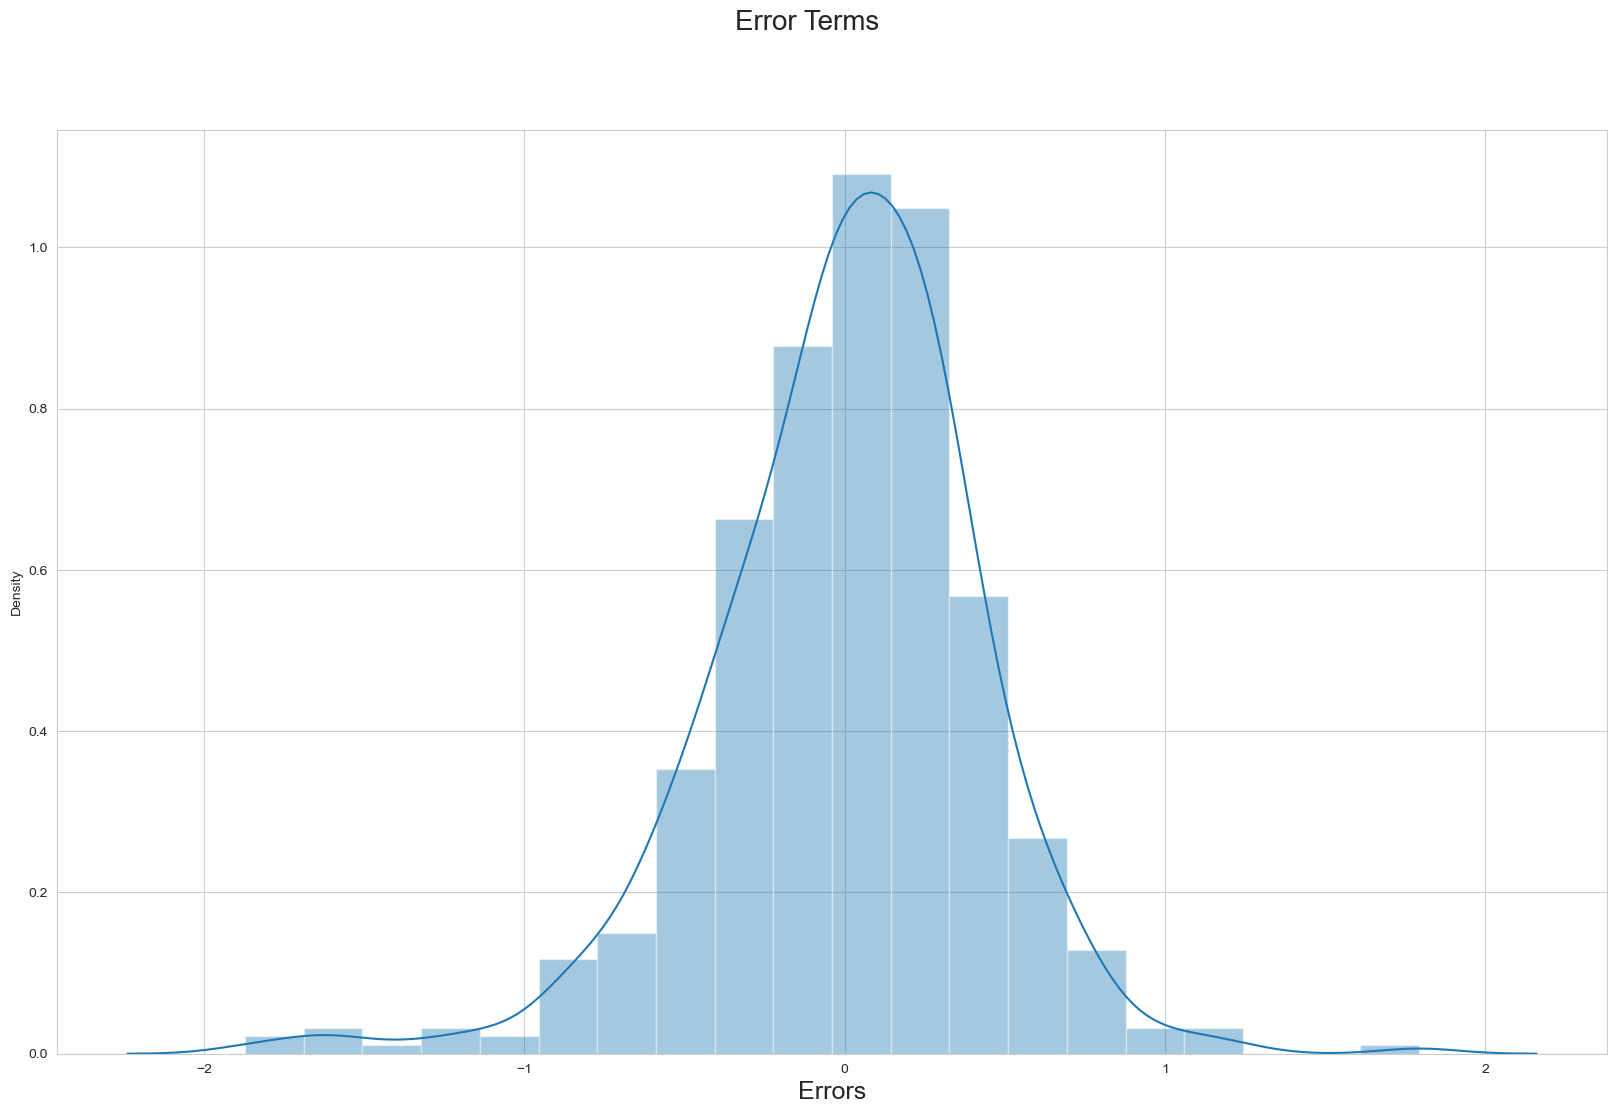

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

>**Insights:**
>
>* error terms are normally distributed

#### Predictions

In [64]:
df_test

,year,temp,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist and Cloudy
184,0,29.793347,63.7917,5.459106,6043.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,32.082500,59.2083,7.625404,6211.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
299,0,19.270000,81.2917,13.250121,2659.0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
221,0,31.433347,42.4167,13.417286,4780.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,0,29.315000,30.5000,19.583229,4968.0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,10.899153,68.7917,11.791732,2947.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
702,1,19.509153,73.3750,11.666643,6606.0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
127,0,21.661653,63.1667,5.000712,4333.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
640,1,26.957500,79.3750,4.458569,7572.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [65]:
# Taking columns of dummy variables
num_vars=['temp', 'humidity', 'windspeed','total_count']

# Transform the featured for test set
df_test[num_vars]= scaler.transform(df_test[num_vars])

**Divinding Test set into X and y**

In [66]:
y_test = df_test.pop('total_count')
X_test = df_test

In [67]:
# Let's check the list of columns which had the 10 variables RFE had selected
col_test=X_train_vif1.columns
col_test

Index(['year', 'temp', 'season_Spring', 'month_July', 'month_Sep',
       'weekday_Wed', 'workingday_working_day', 'weathersit_Light Snow',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_vif1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions
y_test_pred = lm2.predict(X_test_new)

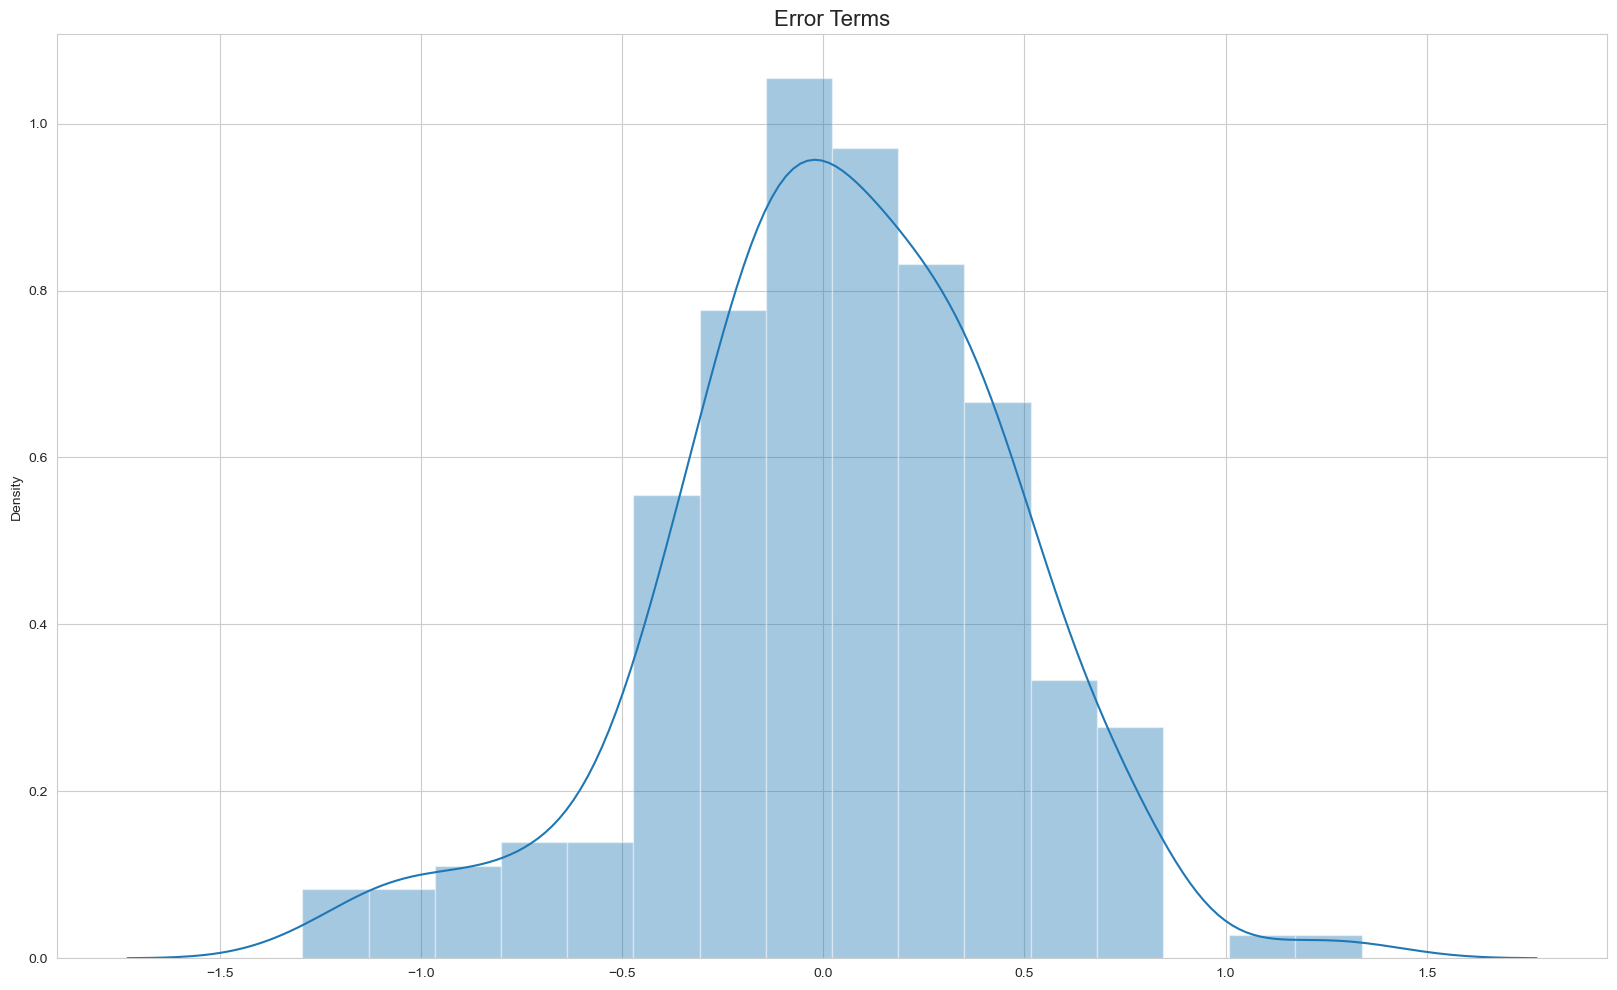

In [77]:
#plotting residual
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

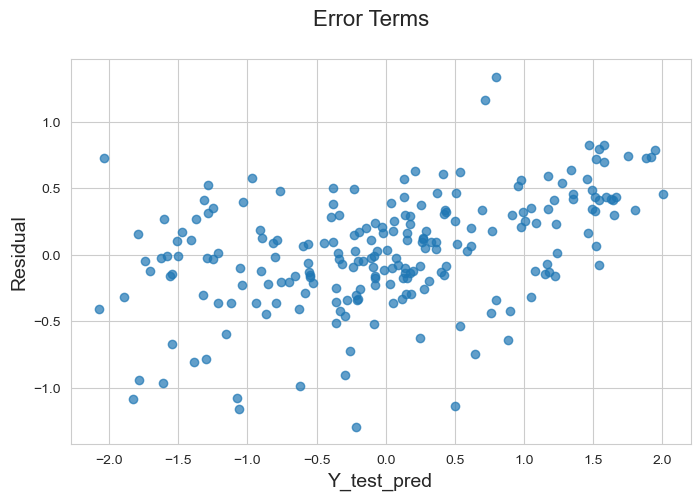

In [80]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test,alpha=0.7)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)  

Text(0, 0.5, 'Predictions')

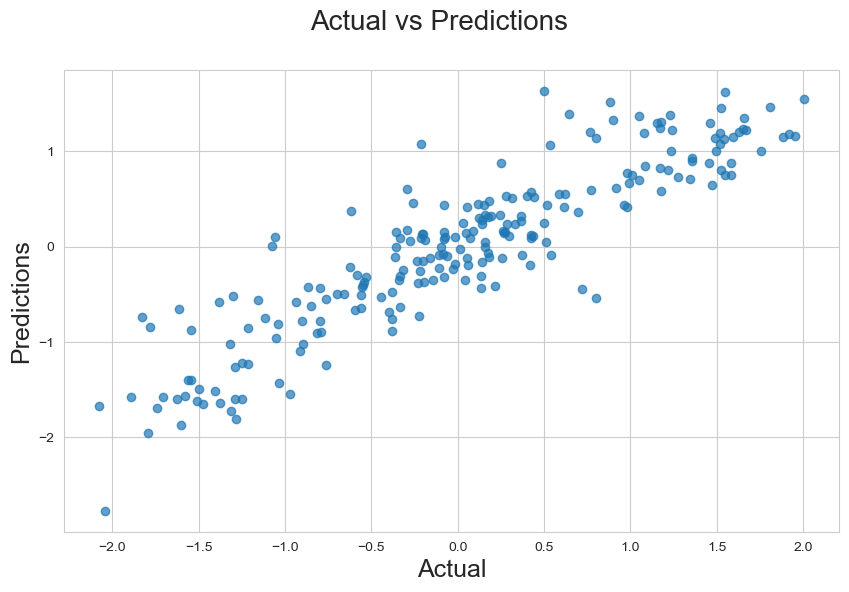

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test_pred,alpha=0.7)
fig.suptitle('Actual vs Predictions', fontsize=20)             
plt.xlabel('Actual', fontsize=18)                         
plt.ylabel('Predictions', fontsize=18)   

In [74]:
#Checking r2-square value
r2_test = r2_score(y_test, y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.808


In [76]:
# list down and check variables of final model
var_final = list(lm2.params.index)
var_final.remove('const')

# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.799


#### Evaluation : Checking the correlations between the final predictor variables

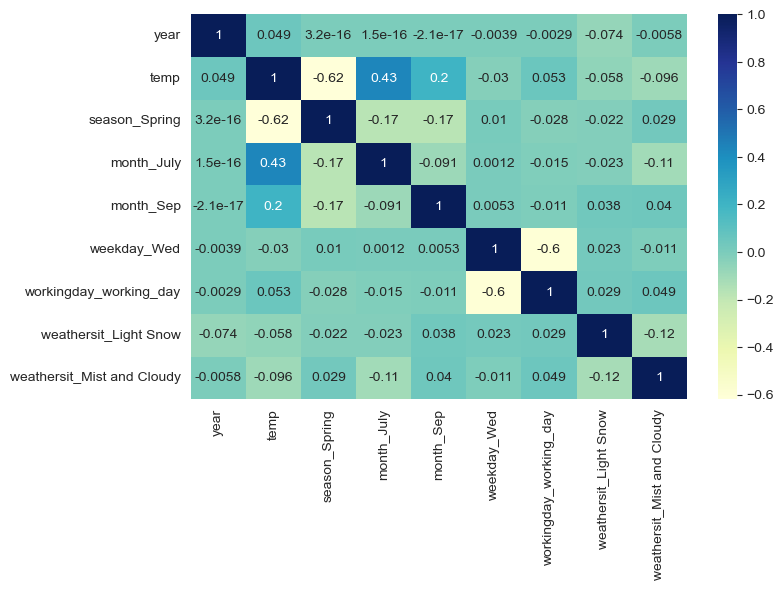

In [72]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df_bike[col_test].corr(), cmap="YlGnBu", annot=True)
plt.show()

>**Insights:**
>
>* This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 
>* The final model consists of 10 variables mentioned above. We can go ahead with this model and use it for predicting count of daily bike rentals.

## **Assumptions of Linear Regression:**

* The error terms are normally distributed.
* The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
* The predicted values have linear relationship with the actual values.
* The distribution plot of error term shows the normal distribution with mean at Zero.

# *`Conclusion`*

In [81]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm2.rsquared,2), '  Adj. R-Squared train:', round(lm2.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm2.params,3))

R- Sqaured train:  0.82   Adj. R-Squared train: 0.816
R- Sqaured test :  0.81   Adj. R-Squared test : 0.799

Coefficent for the variables are:
const                        -0.400
year                          1.046
temp                          0.400
season_Spring                -0.684
month_July                   -0.297
month_Sep                     0.276
weekday_Wed                   0.275
workingday_working_day        0.233
weathersit_Light Snow        -1.319
weathersit_Mist and Cloudy   -0.365
dtype: float64


*Equation for best fit line :*
- **total_count** = -0.4 + (1.046 * year) + (0.4 * temp) + (-0.684 * season_Spring) + (-0.297 * month_July) + (0.276 * month_Sep) + (0.275 * weekday_Wed) + (0.233 * workingday_working_day) + (-1.319 * weathersit_Light Snow) + (-0.365 * weathersit_Mist and Cloudy)

### Major points:

- **We have come to the conclusion, with the final model in our hand. Let's dive in and make assumption on the basis of variables that are effecting the cause, and benefetting the count of Bike Rental. Following are the top 5 variables which is recomendeded to give utmost importance while planning to achieve maximum demand.**

| Spring season| Temperature | Mist and Cloudy | Wednesday | Working day |
| --- | --- | --- | --- | --- |
| -0.684 | 0.400 | -0.365 | 0.275 | 0.233 |

- **From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.**